In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# 1. SETUP PATH FILE
file_path = r'C:\Users\farhan\OneDrive\Documents\UAS ML FARHAN\data_gizi.csv.xlsx'

In [8]:
# 2. LOAD DATA
try:
    df = pd.read_excel(file_path, skiprows=2)
    print("File berhasil dimuat!")
except Exception as e:
    print(f"Gagal memuat file: {e}")
    print("Mencoba menggunakan format CSV...")
    df = pd.read_csv(file_path, skiprows=2)

File berhasil dimuat!


In [9]:
# 3. PREPROCESSING
df.columns = df.columns.str.strip()

In [10]:
# Memastikan data 'Sangat Kurang' dan 'Kurang' berupa angka
df['Sangat Kurang'] = pd.to_numeric(df['Sangat Kurang'], errors='coerce')
df['Kurang'] = pd.to_numeric(df['Kurang'], errors='coerce')

In [11]:
# Menghapus data kosong pada kolom 'Sangat Kurang' dan 'Kurang'
df = df.dropna(subset=['Sangat Kurang', 'Kurang'])

Menghitung Silhouette Score untuk setiap K:
K = 2 | Silhouette Score: 0.5433
K = 3 | Silhouette Score: 0.5980
K = 4 | Silhouette Score: 0.5472
K = 5 | Silhouette Score: 0.5471
K = 6 | Silhouette Score: 0.4753
K = 7 | Silhouette Score: 0.4450
K = 8 | Silhouette Score: 0.4856
K = 9 | Silhouette Score: 0.4695
K = 10 | Silhouette Score: 0.4854


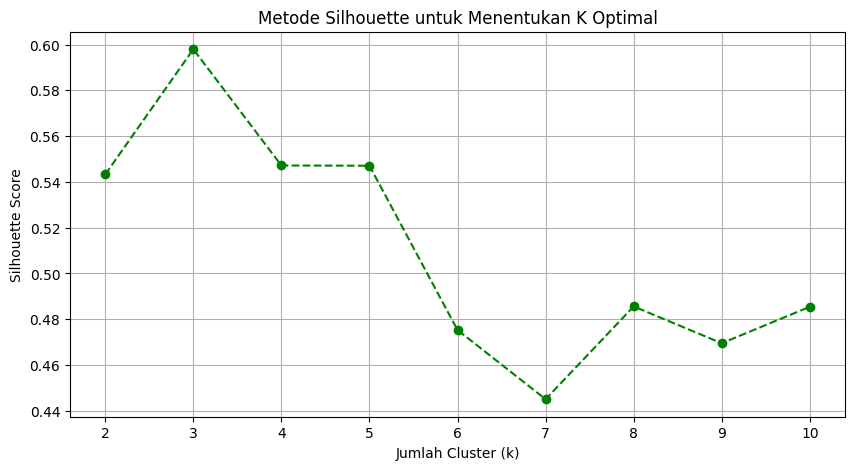

Berdasarkan grafik, jumlah cluster (k) terbaik adalah: 3


In [20]:
# Standarisasi Data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Sangat Kurang', 'Kurang']])
# --- EVALUASI SILHOUETTE SCORE ---
range_n_clusters = range(2, 11)
silhouette_avg_list = []

print("Menghitung Silhouette Score untuk setiap K:")
for n_clusters in range_n_clusters:
    # Inisialisasi KMeans
    kmeans_eval = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans_eval.fit_predict(X_scaled)
    
    # Hitung Silhouette Score
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_avg_list.append(score)
    print(f"K = {n_clusters} | Silhouette Score: {score:.4f}")

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg_list, marker='o', color='green', linestyle='--')
plt.title('Metode Silhouette untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Menentukan K terbaik secara otomatis (skor tertinggi)
best_k = range_n_clusters[silhouette_avg_list.index(max(silhouette_avg_list))]
print(f"Berdasarkan grafik, jumlah cluster (k) terbaik adalah: {best_k}")

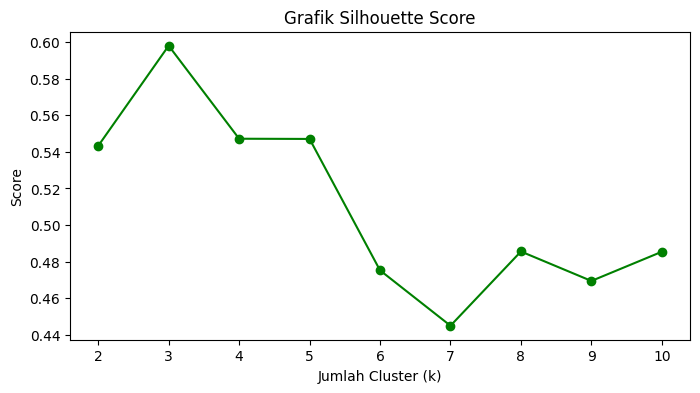

Berdasarkan grafik, K terbaik adalah: 3


In [14]:
#Pencarian K Terbaik
# --- EVALUASI UNTUK MENCARI K TERBAIK ---
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
silhouette_avg_list = []

for n_clusters in range_n_clusters:
    kmeans_temp = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans_temp.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_avg_list.append(score)

# Visualisasi grafik skor
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, silhouette_avg_list, marker='o', color='green')
plt.title('Grafik Silhouette Score')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Score')
plt.show()

# Menentukan K terbaik otomatis
best_k = range_n_clusters[silhouette_avg_list.index(max(silhouette_avg_list))]
print(f"Berdasarkan grafik, K terbaik adalah: {best_k}")

In [15]:
#MODEL FINAL & INTTERPRETASI
# --- RUN MODEL FINAL DENGAN BEST K ---
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Hitung Skor Akhir
final_sil_score = silhouette_score(X_scaled, df['Cluster'])

print(f"\n--- HASIL EVALUASI AKHIR ---")
print(f"Jumlah Cluster yang digunakan: {best_k}")
print(f"Silhouette Score Akhir: {final_sil_score:.4f}")

# Interpretasi
if final_sil_score > 0.5:
    print("Kesimpulan: Struktur cluster sangat kuat.")
elif final_sil_score > 0.25:
    print("Kesimpulan: Struktur cluster cukup baik (medium).")
else:
    print("Kesimpulan: Cluster lemah atau data tumpang tindih.")


--- HASIL EVALUASI AKHIR ---
Jumlah Cluster yang digunakan: 3
Silhouette Score Akhir: 0.5980
Kesimpulan: Struktur cluster sangat kuat.


In [13]:
# 4. METODE ELBOW (Mencari K )
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

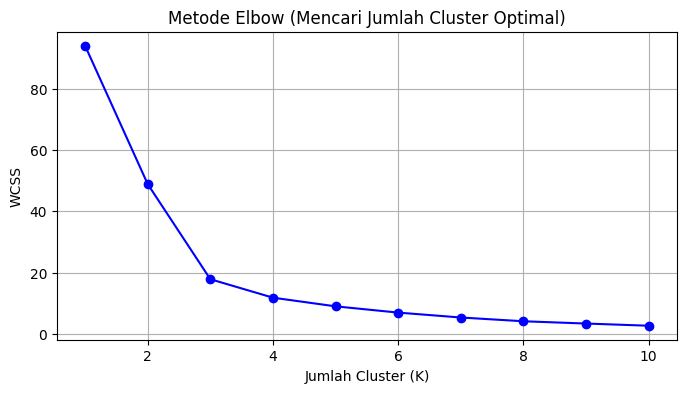

In [20]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title('Metode Elbow (Mencari Jumlah Cluster Optimal)')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [16]:
# 5. MENJALANKAN K-MEANS (K=3)
# Berdasarkan data gizi, di bagi 3: Rendah, Sedang, Tinggi
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

<Axes: xlabel='Sangat Kurang', ylabel='Kurang'>

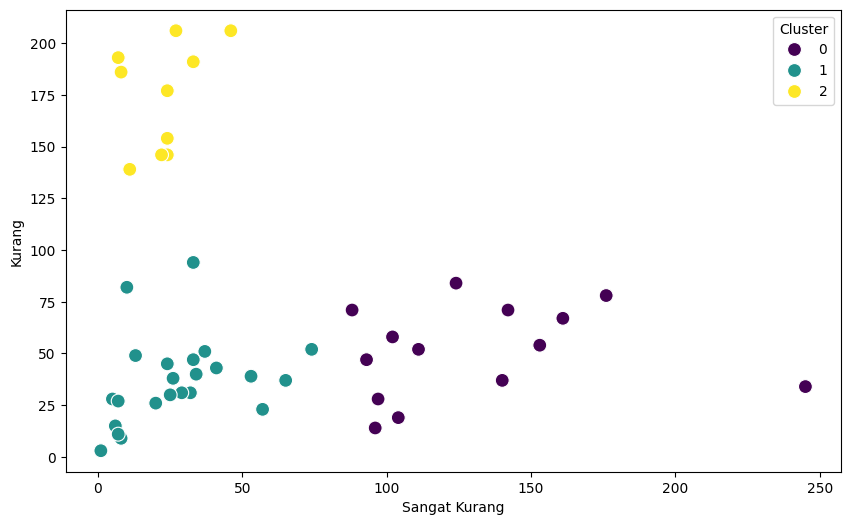

In [17]:
# 6. VISUALISASI HASIL CLUSTERING
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sangat Kurang', y='Kurang', hue='Cluster', palette='viridis', s=100)

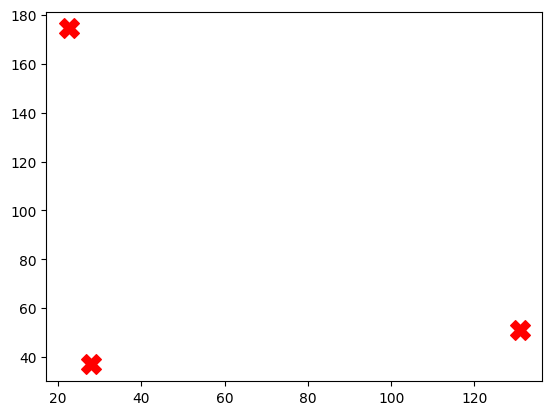

In [18]:
# Menampilkan Titik Pusat (Centroids)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

C:\Users\farhan\AppData\Local\Temp\ipykernel_25492\317840988.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


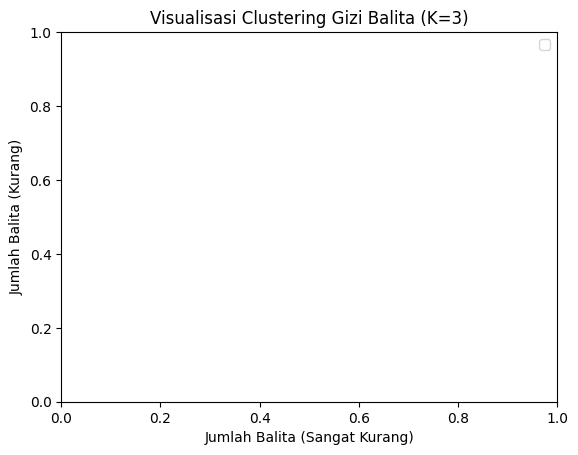

In [19]:
plt.title('Visualisasi Clustering Gizi Balita (K=3)')
plt.xlabel('Jumlah Balita (Sangat Kurang)')
plt.ylabel('Jumlah Balita (Kurang)')
plt.legend()
plt.show()

In [25]:
# 7. ANALISIS HASIL
print("\n--- Rata-rata per Cluster ---")
print(df.groupby('Cluster')[['Sangat Kurang', 'Kurang']].mean())


--- Rata-rata per Cluster ---
         Sangat Kurang  Kurang
Cluster                       
0           130.857143    51.0
1            27.826087    37.0
2            22.600000   174.4


In [26]:
# Simpan hasil ke file baru
output_path = r'C:\Users\farhan\OneDrive\Documents\UAS ML FARHAN\Hasil_Clustering.csv'
df.to_csv(output_path, index=False)
print(f"\nHasil analisis telah disimpan di: {output_path}")


Hasil analisis telah disimpan di: C:\Users\farhan\OneDrive\Documents\UAS ML FARHAN\Hasil_Clustering.csv
